Импорт базы данных

In [9]:
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
ticker = 'AAPL'
period1 = int(time.mktime(datetime.datetime(2020, 12, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 12, 31, 23, 59).timetuple()))
interval = '1d' # 1d, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
# print(df)
df.to_csv('AAPL.csv')

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-01,121.010002,123.470001,120.010002,122.720001,121.634186,127728200
1,2020-12-02,122.019997,123.370003,120.889999,123.080002,121.990997,89004200
2,2020-12-03,123.519997,123.779999,122.209999,122.940002,121.852249,78967600
3,2020-12-04,122.599998,122.860001,121.519997,122.250000,121.168343,78260400
4,2020-12-07,122.309998,124.570000,122.250000,123.750000,122.655075,86712000


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,371.000000,371.000000,371.000000,371.000000,371.000000,3.710000e+02
mean,146.435769,148.095769,144.769946,146.477251,145.822432,9.309889e+07
std,17.386662,17.690972,17.139574,17.429443,17.658713,2.834918e+07
min,119.029999,120.400002,116.209999,116.360001,115.502800,4.100000e+07
25%,130.825005,132.419998,129.470001,130.985001,129.863472,7.432420e+07
50%,145.809998,147.110001,144.630005,146.059998,145.447861,8.865120e+07
75%,160.934998,163.959999,158.625000,161.215004,160.773643,1.076296e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,1.954327e+08


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       371 non-null    object 
 1   Open       371 non-null    float64
 2   High       371 non-null    float64
 3   Low        371 non-null    float64
 4   Close      371 non-null    float64
 5   Adj Close  371 non-null    float64
 6   Volume     371 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.4+ KB


In [16]:
datelist = pd.date_range(datetime.datetime(2020, 12, 1, 23, 59), periods=371).tolist()

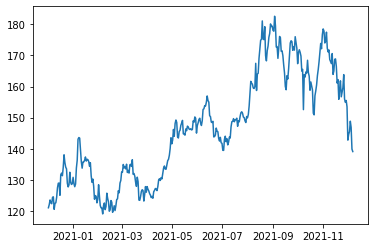

In [17]:
plt.plot(datelist, df['Open'])

https://pypi.org/project/yfinance/

In [18]:
!pip install yfinance
print('yfinance install')

yfinance install


In [19]:
import yfinance as yf

ticket = yf.Ticker("AAPL")

Информация об акции

In [20]:
# get stock info
ticket.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [21]:
# get historical market data
hist = ticket.history(period="max")
print(hist)

                  Open        High         Low       Close     Volume  \
Date                                                                    
1980-12-12    0.100178    0.100614    0.100178    0.100178  469033600   
1980-12-15    0.095388    0.095388    0.094952    0.094952  175884800   
1980-12-16    0.088418    0.088418    0.087983    0.087983  105728000   
1980-12-17    0.090160    0.090596    0.090160    0.090160   86441600   
1980-12-18    0.092774    0.093210    0.092774    0.092774   73449600   
...                ...         ...         ...         ...        ...   
2022-05-16  145.550003  147.520004  144.179993  145.539993   86643800   
2022-05-17  148.860001  149.770004  146.679993  149.240005   78336300   
2022-05-18  146.850006  147.360001  139.899994  140.820007  109742900   
2022-05-19  139.880005  141.660004  136.600006  137.350006  136095600   
2022-05-20  139.089996  140.699997  132.610001  137.589996  137194600   

            Dividends  Stock Splits  
Date        

Поуазывает сплиты и дивиденды

In [22]:
# show actions (dividends, splits)
ticket.actions

,Dividends,Stock Splits
Date,,
1987-05-11,0.000536,0.0
1987-06-16,0.000000,2.0
1987-08-10,0.000536,0.0
1987-11-17,0.000714,0.0
1988-02-12,0.000714,0.0
...,...,...
2021-05-07,0.220000,0.0
2021-08-06,0.220000,0.0
2021-11-05,0.220000,0.0


Квартальный отчёт

In [23]:
# show financials
ticket.quarterly_financials

,2022-03-26,2021-12-25,2021-09-25,2021-06-26
Research Development,6387000000.0,6306000000.0,5772000000.0,5717000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,30139000000.0,41241000000.0,23248000000.0,24369000000.0
Minority Interest,None,None,None,None
Net Income,25010000000.0,34630000000.0,20551000000.0,21744000000.0
Selling General Administrative,6193000000.0,6449000000.0,5616000000.0,5412000000.0
Gross Profit,42559000000.0,54243000000.0,35174000000.0,35255000000.0
Ebit,29979000000.0,41488000000.0,23786000000.0,24126000000.0
Operating Income,29979000000.0,41488000000.0,23786000000.0,24126000000.0
Other Operating Expenses,None,None,None,None


Годовой отчёт

In [24]:
# show financials
ticket.financials

,2021-09-25,2020-09-26,2019-09-28,2018-09-29
Research Development,21914000000.0,18752000000.0,16217000000.0,14236000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,109207000000.0,67091000000.0,65737000000.0,72903000000.0
Minority Interest,None,None,None,None
Net Income,94680000000.0,57411000000.0,55256000000.0,59531000000.0
Selling General Administrative,21973000000.0,19916000000.0,18245000000.0,16705000000.0
Gross Profit,152836000000.0,104956000000.0,98392000000.0,101839000000.0
Ebit,108949000000.0,66288000000.0,63930000000.0,70898000000.0
Operating Income,108949000000.0,66288000000.0,63930000000.0,70898000000.0
Other Operating Expenses,None,None,None,None


Основные держатели акции

In [25]:
# show major holders
ticket.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,59.60%,% of Shares Held by Institutions
2,59.64%,% of Float Held by Institutions
3,5508,Number of Institutions Holding Shares


Информация об институцианальных держателях

In [26]:
# show institutional holders
ticket.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1269995750,2022-03-30,0.0785,221753957907
1,Blackrock Inc.,1027632887,2022-03-30,0.0635,179434978399
2,"Berkshire Hathaway, Inc",890923410,2022-03-30,0.0550,155564136620
3,State Street Corporation,613852274,2022-03-30,0.0379,107184745563
4,"FMR, LLC",351584762,2022-03-30,0.0217,61390215292
5,"Geode Capital Management, LLC",272081668,2022-03-30,0.0168,47508180049
6,Price (T.Rowe) Associates Inc,233079365,2022-03-30,0.0144,40697987922
7,Northern Trust Corporation,186031985,2022-03-30,0.0115,32483044900
8,Bank of America Corporation,144401747,2022-03-30,0.0089,25213989043
9,Norges Bank Investment Management,142076403,2021-12-30,0.0088,25228506880


Информация о квартальных балансах компании

In [27]:
# show balance sheet
ticket.quarterly_balance_sheet

,2022-03-26,2021-12-25,2021-09-25,2021-06-26
Total Liab,2.832630e+11,3.092590e+11,2.879120e+11,2.655600e+11
Total Stockholder Equity,6.739900e+10,7.193200e+10,6.309000e+10,6.428000e+10
Other Current Liab,5.816800e+10,5.704300e+10,5.357700e+10,5.130600e+10
Total Assets,3.506620e+11,3.811910e+11,3.510020e+11,3.298400e+11
Common Stock,6.118100e+10,5.842400e+10,5.736500e+10,5.498900e+10
Other Current Assets,1.580900e+10,1.811200e+10,1.411100e+10,1.364100e+10
Retained Earnings,1.271200e+10,1.443500e+10,5.562000e+09,9.233000e+09
Other Liab,5.243200e+10,5.505600e+10,4.305000e+10,3.835400e+10
Treasury Stock,-6.494000e+09,-9.270000e+08,1.630000e+08,5.800000e+07
Other Assets,5.195900e+10,5.010900e+10,3.876200e+10,4.485400e+10


Информация о годовых балансах компании

In [28]:
# show balance sheet
ticket.balance_sheet

,2021-09-25,2020-09-26,2019-09-28,2018-09-29
Total Liab,2.879120e+11,2.585490e+11,2.480280e+11,2.585780e+11
Total Stockholder Equity,6.309000e+10,6.533900e+10,9.048800e+10,1.071470e+11
Other Current Liab,5.357700e+10,4.786700e+10,4.324200e+10,3.929300e+10
Total Assets,3.510020e+11,3.238880e+11,3.385160e+11,3.657250e+11
Common Stock,5.736500e+10,5.077900e+10,4.517400e+10,4.020100e+10
Other Current Assets,1.411100e+10,1.126400e+10,1.235200e+10,1.208700e+10
Retained Earnings,5.562000e+09,1.496600e+10,4.589800e+10,7.040000e+10
Other Liab,4.305000e+10,4.610800e+10,5.050300e+10,4.891400e+10
Treasury Stock,1.630000e+08,-4.060000e+08,-5.840000e+08,-3.454000e+09
Other Assets,3.876200e+10,3.395200e+10,3.297800e+10,2.228300e+10


Кэш-флоу компании по годам

In [29]:
# show cashflow
ticket.cashflow
ticket.quarterly_cashflow

,2022-03-26,2021-12-25,2021-09-25,2021-06-26
Investments,-6.390000e+09,-1.292900e+10,4.608000e+09,5.747000e+09
Change To Liabilities,-2.139800e+10,2.027500e+10,1.405000e+10,3.070000e+08
Total Cashflows From Investing Activities,-9.265000e+09,-1.610600e+10,8.350000e+08,3.572000e+09
Net Borrowings,-1.751000e+09,-1.000000e+09,3.220000e+09,3.220000e+09
Total Cash From Financing Activities,-2.835100e+10,-2.815900e+10,-2.038200e+10,-2.939600e+10
Change To Operating Activities,9.486000e+09,-1.049700e+10,-5.602000e+09,-6.048000e+09
Net Income,2.501000e+10,3.463000e+10,2.055100e+10,2.174400e+10
Change In Cash,-9.450000e+09,2.701000e+09,6.530000e+08,-4.730000e+09
Repurchase Of Stock,-2.296100e+10,-2.336600e+10,-2.044900e+10,-2.559500e+10
Total Cash From Operating Activities,2.816600e+10,4.696600e+10,2.020000e+10,2.109400e+10


Доходы компании

In [30]:
# show earnings
ticket.earnings
ticket.quarterly_earnings

,Revenue,Earnings
Quarter,,
2Q2021,81434000000,21744000000
3Q2021,83360000000,20551000000
4Q2021,123945000000,34630000000
1Q2022,97278000000,25010000000


Параметры устойчивости компании(риски в инвистировании)

In [31]:
# show sustainability
ticket.sustainability

,Value
2022-5,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,6.86
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


Рекомендации по инвестированию

In [32]:
# show analysts recommendations
ticket.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 08:17:00,Canaccord Genuity,Buy,,main
2012-03-08 07:33:00,FBN Securities,Outperform,,main
2012-03-13 06:08:00,Jefferies,Buy,,main
2012-03-14 06:13:00,Morgan Stanley,Overweight,,main
2012-03-14 08:21:00,Canaccord Genuity,Buy,,main
...,...,...,...,...
2022-04-29 11:12:56,Morgan Stanley,Overweight,,main
2022-04-29 12:00:09,Deutsche Bank,Buy,,main
2022-04-29 12:47:34,Credit Suisse,Neutral,,main


Календарь событий компании

In [33]:
# show next event (earnings, etc)
ticket.calendar

,0,1
Earnings Date,2022-07-25 20:00:00,2022-07-29 20:00:00
Earnings Average,1.16,1.16
Earnings Low,1.07,1.07
Earnings High,1.32,1.32
Revenue Average,82615500000,82615500000
Revenue Low,78881000000,78881000000
Revenue High,88405000000,88405000000


Показать ISIN

In [34]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
ticket.isin

KeyboardInterrupt: 

In [ ]:
# show options expirations
ticket.options

('2022-05-13',
 '2022-05-20',
 '2022-05-27',
 '2022-06-03',
 '2022-06-10',
 '2022-06-17',
 '2022-06-24',
 '2022-07-15',
 '2022-08-19',
 '2022-09-16',
 '2022-10-21',
 '2022-11-18',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16',
 '2023-09-15',
 '2024-01-19',
 '2024-06-21')

Новости на Yahoo Finance

In [ ]:
# show news
ticket.news

[{'uuid': '3815a622-4bd5-3ce2-974b-8efbb65626e8',
  'title': 'Best Fintech 2022: See The Leaders In Digital Wallets, Crypto Apps And More',
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/3815a622-4bd5-3ce2-974b-8efbb65626e8/best-fintech-2022%3A-see-the.html',
  'providerPublishTime': 1652465777,
  'type': 'STORY'},
 {'uuid': 'f3285ca6-46ca-476c-b98d-3763c526fa59',
  'title': "Disney CEO: ESPN viewers won't need cable in the future",
  'publisher': 'Yahoo Finance',
  'link': 'https://finance.yahoo.com/news/disney-ceo-espn-viewers-wont-need-cable-in-the-future-180334253.html',
  'providerPublishTime': 1652465014,
  'type': 'STORY'},
 {'uuid': 'cfac2917-86eb-3834-bc45-e49db207fad5',
  'title': '10 Best Tech Stocks to Buy Now According to Joe Dimenna’s Zweig-DiMenna Partners',
  'publisher': 'Insider Monkey',
  'link': 'https://finance.yahoo.com/news/10-best-tech-stocks-buy-162458347.html',
  'providerPublishTime': 1652459098,
  'type': 'STORY'},
 {'uuid

To initialize multiple Ticker objects, use

In [46]:
tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects
tickers.tickers.MSFT

AttributeError: 'dict' object has no attribute 'MSFT'

In [42]:


# access each ticker using (example)
tickers.tickers.MSFT.info
tickers.tickers.AAPL.history(period="1mo")
tickers.tickers.GOOG.actions

AttributeError: 'dict' object has no attribute 'tickers'

In [147]:
report = pd.read_csv('kek.csv', parse_dates=[3, 4]) 

In [149]:
report_1 = report[['Quater of report','Signing date','Name of Issuer','Ticker of Issuer']]
report_1

,Quater of report,Signing date,Name of Issuer,Ticker of Issuer
0,2022-03-31,2022-05-11,A10 NETWORKS INC,ATEN
1,2022-03-31,2022-05-11,ABBVIE INC,ABBV
2,2022-03-31,2022-05-11,ACCEL ENTERTAINMENT INC,acel
3,2022-03-31,2022-05-11,ADTRAN INC,ADTN
4,2022-03-31,2022-05-11,AMERESCO INC,AMRC
...,...,...,...,...
103,2022-03-31,2022-05-11,VANGUARD INTL EQUITY INDEX F,VWO.MX
104,2022-03-31,2022-05-11,VERITEX HLDGS INC,47Y.F
105,2022-03-31,2022-05-11,WHOLE EARTH BRANDS INC,FREE
106,2022-03-31,2022-05-11,WINTRUST FINL CORP,No Symbol Found


In [150]:
report_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Quater of report  108 non-null    datetime64[ns]
 1   Signing date      108 non-null    datetime64[ns]
 2   Name of Issuer    108 non-null    object        
 3   Ticker of Issuer  108 non-null    object        
dtypes: datetime64[ns](2), object(2)
memory usage: 3.5+ KB


In [151]:
import numpy as np

In [152]:
Total_IMEI = report_1['Ticker of Issuer'].nunique()
IMEI = report_1['Ticker of Issuer'].unique()
First_Date = report_1.groupby('Ticker of Issuer')['Quater of report'].first().reset_index()
Last_Date = report_1.groupby('Ticker of Issuer')['Quater of report'].last().reset_index().rename(columns={'Quater of report':'Last date'})

In [153]:
Total_IMEI

82

In [154]:
IMEI

array(['ATEN', 'ABBV', 'acel', 'ADTN', 'AMRC', 'AVD', 'ABCB', 'POWW',
       'ANIP', 'APEN', 'ARQT', 'No Symbol Found', 'AVNT', 'BMTX', 'BOX',
       'CA8A.F', 'CADE', 'CRS', 'CRNC', 'I3N.BE', 'CRUS', 'CIO', 'CPA',
       'CTOS', 'DAR', 'APPS', 'DCGO', 'DKNG', 'DT', 'DZSI', 'EEX', 'GSM',
       'GIII', 'GMDA', 'GMRE', 'HSI.SG', 'HPK', 'HZNP', 'HBM', 'REM',
       'KLR', 'KFY', 'LTHM', 'LOVE', 'MX', 'MGNI', 'MNKD', 'MXL', 'MSFT',
       '1NV.F', 'NVDA', 'LPRO', 'PCRX', 'PRTK', 'PTEN', 'PAYC', 'PERI',
       'PPC', 'PWSC', 'PCT', 'QTEK', 'QDEL', 'ROCC', 'RGEN', 'RSVR',
       'RNG', 'ROCGU', 'SEEL', 'SMTC', 'SIMO', 'SM', 'XBI', 'SYNH',
       'TNDM', 'TCBX', 'TLYS', 'TTTPF', 'TYME', 'OLED', 'VWO.MX', '47Y.F',
       'FREE'], dtype=object)

In [155]:
First_Date

,Ticker of Issuer,Quater of report
0,1NV.F,2022-03-31
1,47Y.F,2022-03-31
2,ABBV,2022-03-31
3,ABCB,2022-03-31
4,ADTN,2022-03-31
...,...,...
77,TTTPF,2022-03-31
78,TYME,2022-03-31
79,VWO.MX,2022-03-31
80,XBI,2022-03-31


In [156]:
Last_Date

,Ticker of Issuer,Last date
0,1NV.F,2022-03-31
1,47Y.F,2022-03-31
2,ABBV,2022-03-31
3,ABCB,2022-03-31
4,ADTN,2022-03-31
...,...,...
77,TTTPF,2022-03-31
78,TYME,2022-03-31
79,VWO.MX,2022-03-31
80,XBI,2022-03-31


In [157]:
report_2 = pd.merge(First_Date, Last_Date)

In [200]:
report_2['Quater of report'] = pd.PeriodIndex(report_2['Quater of report'], freq='Q').to_timestamp()

In [201]:
report_2

,Ticker of Issuer,Quater of report,Last date
0,1NV.F,2022-01-01,2022-03-31
1,47Y.F,2022-01-01,2022-03-31
2,ABBV,2022-01-01,2022-03-31
3,ABCB,2022-01-01,2022-03-31
4,ADTN,2022-01-01,2022-03-31
...,...,...,...
77,TTTPF,2022-01-01,2022-03-31
78,TYME,2022-01-01,2022-03-31
79,VWO.MX,2022-01-01,2022-03-31
80,XBI,2022-01-01,2022-03-31


In [167]:
report_2['Quater of report'].dt.month

0     3
1     3
2     3
3     3
4     3
     ..
77    3
78    3
79    3
80    3
81    3
Name: Quater of report, Length: 82, dtype: int64

In [279]:
hist = yf.download('ADTN').reset_index()

[*********************100%***********************]  1 of 1 completed


In [280]:
def Ticket(ticket, first_date, last_date):

    # get historical market data
    # ticket = yf.Ticker(ticket)
    print(ticket)
    # hist = ticket.history(start=first_date, end=last_date).reset_index()
    hist = yf.download(ticket).reset_index()
    # hist = yf.download(ticket, start=first_date, end=last_date).reset_index()
    # hist = ticket.history(period="max").reset_index()
    
    return(hist)


In [253]:
reports_df = {name: pd.DataFrame(report_2) for name in report_2['Ticker of Issuer']}

In [ ]:
from pathlib import Path  
filepath = Path('D:\GitHub\Yahoo-project\AAPL.csvout.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

In [282]:
d = {}

for index in range(len(report_2)):
    d[index] = pd.DataFrame(Ticket(report_2['Ticker of Issuer'].loc[index], report_2['Quater of report'].loc[index], report_2['Last date'].loc[index]))

1NV.F
[*********************100%***********************]  1 of 1 completed
47Y.F
[*********************100%***********************]  1 of 1 completed
ABBV
[*********************100%***********************]  1 of 1 completed
ABCB
[*********************100%***********************]  1 of 1 completed
ADTN
[*********************100%***********************]  1 of 1 completed
AMRC
[*********************100%***********************]  1 of 1 completed
ANIP
[*********************100%***********************]  1 of 1 completed
APEN
[*********************100%***********************]  1 of 1 completed
APPS
[*********************100%***********************]  1 of 1 completed
ARQT
[*********************100%***********************]  1 of 1 completed
ATEN
[*********************100%***********************]  1 of 1 completed
AVD
[*********************100%***********************]  1 of 1 completed
AVNT
[*********************100%***********************]  1 of 1 completed
BMTX
[*********************100%******

In [285]:
d[1]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-14,26.600000,26.600000,26.600000,26.600000,24.744823,0
1,2020-02-17,26.209999,26.219999,26.180000,26.219999,24.391327,0
2,2020-02-18,26.225000,26.389999,26.200001,26.200001,24.372723,0
3,2020-02-19,25.870001,25.870001,25.870001,25.870001,24.065741,0
4,2020-02-20,26.084999,26.084999,26.084999,26.084999,24.265741,0
...,...,...,...,...,...,...,...
571,2022-05-16,31.000000,31.000000,31.000000,31.000000,31.000000,0
572,2022-05-17,30.600000,30.600000,30.600000,30.600000,30.600000,0
573,2022-05-18,31.799999,31.799999,31.799999,31.799999,31.799999,0
574,2022-05-19,30.600000,30.600000,30.600000,30.600000,30.600000,0


In [82]:
data = yf.download(['GOOG','META'], start= )

[*********************100%***********************]  2 of 2 completed


In [83]:
data

Adj Close               Close                High           \
                   GOOG   META         GOOG   META         GOOG     META   
Date                                                                       
2022-04-21  2498.750000  10.17  2498.750000  10.17  2606.149902  10.7950   
2022-04-22  2392.280029   9.95  2392.280029   9.95  2509.040039  10.2994   
2022-04-25  2465.000000  10.08  2465.000000  10.08  2465.560059  10.0900   
2022-04-26  2390.120117   9.63  2390.120117   9.63  2455.000000  10.0100   
2022-04-27  2300.409912   9.47  2300.409912   9.47  2350.000000   9.7500   
2022-04-28  2388.229980   9.94  2388.229980   9.94  2408.770020  10.0150   
2022-04-29  2299.330078   9.60  2299.330078   9.60  2379.199951  10.1250   
2022-05-02  2343.139893   9.89  2343.139893   9.89  2346.790039   9.8900   
2022-05-03  2362.590088   9.87  2362.590088   9.87  2386.000000  10.0000   
2022-05-04  2451.500000  10.19  2451.500000  10.19  2462.860107  10.2200   
2022-05-05  2334.929932   9.56  2334.929932   9.56  2424.665039  10.0700   
2022-05-06  2313.199951   9.25  2313.199951   9.25  2349.969971   9.5100   
2022-05-09  2261.679932   8.65  2261.679932   8.65  2311.258057   9.0800   
2022-05-10  2291.689941   8.63  2291.689941   8.63  2333.820068   8.9100   
2022-05-11  2279.219971   8.24  2279.219971   8.24  2333.419922   8.7100   
2022-05-12  2263.219971   8.42  2263.219971   8.42  2297.129883   8.6200   
2022-05-13  2330.310059   8.99  2330.310059   8.99  2361.699951   9.0200   
2022-05-16  2295.850098   8.81  2295.850098   8.81  2332.149902   9.0500   
2022-05-17  2334.030029   9.11  2334.030029   9.11  2344.550049   9.1850   
2022-05-18  2248.020020   8.76  2248.020020   8.76  2313.913086   9.1000   
2022-05-19  2214.909912   8.88  2214.909912   8.88  2271.750000   9.0694   
2022-05-20  2186.260010    NaN  2186.260010    NaN  2251.000000      NaN   

                    Low                  Open           Volume             
                   GOOG     META         GOOG    META     GOOG       META  
Date                                                                       
2022-04-21  2493.000000  10.1201  2587.000000  10.620  1507900   992200.0  
2022-04-22  2382.810059   9.9100  2500.000000  10.150  2320500   768485.0  
2022-04-25  2375.385010   9.7600  2388.590088   9.760  1726100   852138.0  
2022-04-26  2383.237061   9.6200  2455.000000  10.010  2469700  1008295.0  
2022-04-27  2262.485107   9.4300  2287.459961   9.540  3111900   825276.0  
2022-04-28  2302.877930   9.4950  2342.300049   9.770  1839500   785633.0  
2022-04-29  2293.879883   9.5700  2351.560059   9.790  1683500   594323.0  
2022-05-02  2267.989990   9.5100  2278.129883   9.570  1514000   458515.0  
2022-05-03  2332.540039   9.7600  2335.300049   9.860  1060800   427558.0  
2022-05-04  2314.770020   9.5450  2360.070068   9.870  1661600   643393.0  
2022-05-05  2303.649902   9.4200  2404.409912  10.070  2154500   606939.0  
2022-05-06  2282.860107   9.1100  2310.379883   9.430  1764000   605920.0  
2022-05-09  2251.030029   8.5900  2266.070068   9.000  1726000  1014860.0  
2022-05-10  2267.666016   8.4250  2320.810059   8.878  1557900  2475298.0  
2022-05-11  2273.000000   8.2002  2274.209961   8.390  1825100   902802.0  
2022-05-12  2202.270020   8.0007  2238.760010   8.070  2073200  1408279.0  
2022-05-13  2280.000000   8.6100  2296.909912   8.630  1486000   532062.0  
2022-05-16  2286.699951   8.7900  2307.679932   8.910  1164100   404983.0  
2022-05-17  2306.750000   8.8800  2344.550049   9.030  1078800   444752.0  
2022-05-18  2242.840088   8.7220  2304.750000   8.970  1399100   563532.0  
2022-05-19  2209.360107   8.6900  2236.820068   8.720  1459600   547759.0  
2022-05-20  2127.459961      NaN  2241.709961     NaN  1878100        NaN

In [286]:
import requests


def get_symbol(symbol):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)

    result = requests.get(url).json()

    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']


company = get_symbol("MSFT")

print(company)

JSONDecodeError: [Errno Expecting value] <!DOCTYPE html>
<html lang="en-us">
  <head>
    <meta http-equiv="content-type" content="text/html; charset=UTF-8">
    <meta charset="utf-8">
    <title>Yahoo</title>
    <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
    <style>
      html {
          height: 100%;
      }
      body {
          background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;
          background-size: cover;
          height: 100%;
          text-align: center;
          font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;
          margin: 0;
      }
      table {
          height: 100%;
          width: 100%;
          table-layout: fixed;
          border-collapse: collapse;
          border-spacing: 0;
          border: none;
      }
      h1 {
          font-size: 42px;
          font-weight: 400;
          color: #400090;
      }
      p {
          color: #1A1A1A;
      }
      #message-1 {
          font-weight: bold;
          margin: 0;
      }
      #message-2 {
          display: inline-block;
          *display: inline;
          zoom: 1;
          max-width: 17em;
          _width: 17em;
      }
      </style>
      <script>
      !function(){if(window==window.top){var o=window.location.host;o.endsWith(".yahoo.com")&&window.location.replace("https://www.yahoo.com/"),o.endsWith(".aol.com")&&window.location.replace("https://www.aol.com/"),o.endsWith(".huffpost.com")&&window.location.replace("https://www.huffpost.com/"),o.endsWith(".engadget.com")&&window.location.replace("https://www.engadget.com/")}}();
      </script>
  </head>
  <body>
  <!-- status code : 404 -->
  <!-- Not Found on Accelerator -->
  <!-- host machine: e9.ycpi.deb.yahoo.com -->
  <!-- timestamp: 1653308610.831 -->
  <!-- url: http://d.yimg.com/autoc.finance.yahoo.com/autoc?query=MSFT&region=1&lang=en-->
  <script type="text/javascript">
    function buildUrl(url, parameters){
      var qs = [];
      for(var key in parameters) {
        var value = parameters[key];
        qs.push(encodeURIComponent(key) + "=" + encodeURIComponent(value));
      }
      url = url + "?" + qs.join('&');
      return url;
    }

    function generateBRBMarkup(site) {
      params.source = 'brb';
      generateBeaconMarkup(params);
      var englishHeader = 'Will be right back...';
      var englishMessage1 = 'Thank you for your patience.';
      var englishMessage2 = 'Our engineers are working quickly to resolve the issue.';
      var defaultLogoStyle = '';
      var siteDataMap = {
        'default': {
          logo: 'https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png',
          logoAlt: 'Yahoo Logo',
          logoStyle: defaultLogoStyle,
          header: englishHeader,
          message1: englishMessage1,
          message2: englishMessage2
        }
      };

      var siteDetails = siteDataMap['default'];

      document.write('<table><tbody><tr><td>');
      document.write('<div id="content">');
      document.write('<img src="' + siteDetails['logo'] + '" alt="' + siteDetails['logoAlt'] + '" style="' + siteDetails['logoStyle'] + '">');
      document.write('<h1 style="margin-top:20px;">' + siteDetails['header'] + '</h1>');
      document.write('<p id="message-1">' + siteDetails['message1'] + '</p>');
      document.write('<p id="message-2">' + siteDetails['message2'] + '</p>');
      document.write('</div>');
      document.write('</td></tr></tbody></table>');
    }

    function generateBeaconMarkup(params) {
        document.write('<img src="' + buildUrl('//geo.yahoo.com/b', params) + '" style="display:none;" width="0px" height="0px"/>');
        var beacon = new Image();
        beacon.src = buildUrl('//bcn.fp.yahoo.com/p', params);
    }

    var hostname = window.location.hostname;
    var device = 'featurephone';
    var ynet = ('-' === '1');
    var time = new Date().getTime();
    var params = {
        s: '1197757129',
        t: time,
        err_url: document.URL,
        err: '404',
        test: '-',
        ats_host: 'e9.ycpi.deb.yahoo.com',
        rid: '-',
        message: 'Not Found on Accelerator'
    };

    if(ynet) {
        document.write('<div style="height: 5px; background-color: red;"></div>');
    }
    generateBRBMarkup(hostname, params);

  </script>
  <noscript>
  <table>
    <tbody>
      <tr>
        <td>
          <div id="englishContent">
            <h1 style="margin-top:20px;">Will be right back...</h1>
            <p id="message-1">Thank you for your patience.</p>
            <p id="message-2">Our engineers are working quickly to resolve the issue.</p>
          </div>
        </td>
      </tr>
    </tbody>
  </table>
  </noscript>
  </body>
</html>
: 0